# 2025-08-29 Conditioning

* Quiz

* Condition numbers

* Reliable = well conditioned and stable

* Forward and backward error 

## Exact arithmatic with rounded values

Floating point arithmatic is therefore exact arithmatic with rounding.

We define $\oplus, \ominus, \otimes, \oslash$ as the floating point arithmatic versions of $+, -, \times, /$.

Our relative accuracy is therefore

$$ \frac{\lvert \left( x \otimes y \right) - \left( x \times y \right) \rvert}{\lvert x \times y \rvert} \leq \epsilon_\text{machine} $$

## Composition

I would hope that this is true

$$ \frac{\lvert \left( \left( x \otimes y \right) \otimes z \right) - \left( \left( x \times y \right) \times z \right) \rvert}{\lvert \left( x \times y \right) \times z \rvert} \leq^? \epsilon_\text{machine} $$

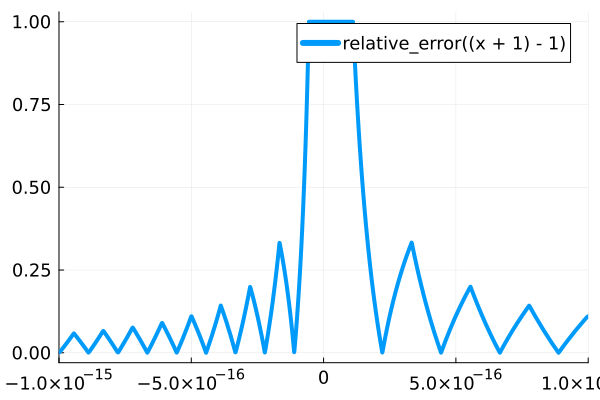

In [1]:
# Let's test it with addition
using Plots
default(lw=4, ms=5, legendfontsize=12, xtickfontsize=12, ytickfontsize=12)

function relativeerror(f, f_true, x)
    fx = f(x)
    fx_true = f_true(x)
    max(abs(fx - fx_true) / abs(fx_true), eps())
end

f1(x; y = 1, z = -1) = (x + y) + z;
a = 1e-15
plot(x -> relativeerror(f1, x -> x, x), xlims=(-a, a), label="relative_error((x + 1) - 1)")

## Conditioning

So which functions cause small errors to grow?

Consider a function $f : X \rightarrow Y$.
The **condition number** is defined as

$$ \hat{\kappa} = \lim_{\delta \rightarrow 0} \max_{\lvert \delta x \rvert < \delta} \frac{f \left( x + \delta x \right) - f \left( x \right)}{\lvert \delta x \rvert} = \max_{\delta x} \frac{\lvert \delta f \rvert}{\lvert \delta x \rvert} $$

If $f$ is differentiable, then $\hat{\kappa} = \lvert f' \left( x \right) \lvert$.

Floating point numbers offer relative accuracy, so we define the **relative condition number** as

$$ \kappa = \max_{\delta x} \frac{\lvert \delta f \rvert / \lvert f \rvert}{\lvert \delta x \rvert / \lvert x \rvert} = \max_{\delta x} \frac{\lvert \delta f \rvert / \lvert \delta x \rvert}{\lvert f \rvert / \vert x \rvert} $$

If $f$ is differentiable, then $\kappa = \left\lvert f' \left( x \right) \right\rvert \frac{\lvert x \rvert}{\lvert f \rvert}$.

## Condition numbers

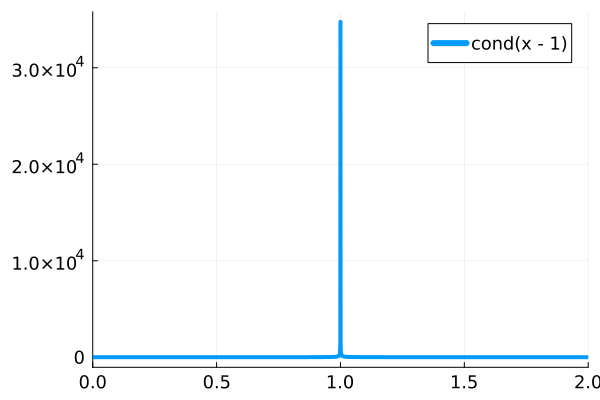

In [2]:
# Let's start with an easy example
f1(x) = x - 1
df1(x) = 1
plot(x -> abs(df1(x)) * abs(x) / abs(f1(x)), xlims=(0, 2), label="cond(x - 1)")

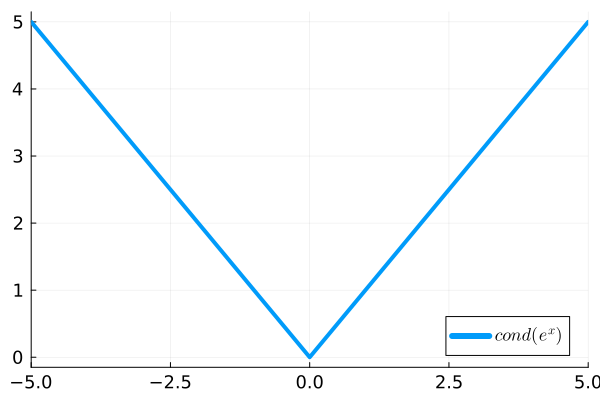

In [3]:
# How about e^x
f2(x) = exp(x)
df2(x) = exp(x)
plot(x -> abs(df2(x)) * abs(x) / abs(f2(x)), xlims=(-5, 5), label="\$cond(e^x)\$")

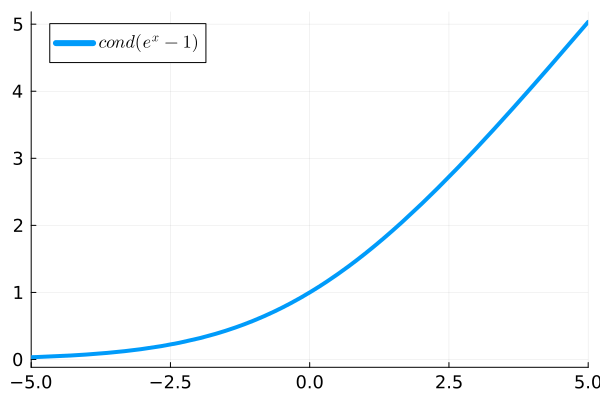

In [4]:
# And back to our friend e^x - 1
f3(x) = exp(x) - 1
df3(x) = exp(x)
plot(x -> abs(df3(x)) * abs(x) / abs(f3(x)), xlims=(-5, 5), label="\$cond(e^x - 1)\$")

* The function $f_3 \left( x \right) = e^x - 1$ is well-conditioned

* The function $f_2 \left( x \right) = e^x$ is well-conditioned

* The function $f_1 \left( x \right) = x - 1$ is ill-conditioned when $x \approx 1$

So if the condition number isn't the problem, why do we have a problem with $f_3 \left( x \right) = e^x - 1$

## Stability

* `f3(x) = exp(x) - 1` is **unstable**

* Algorithms are made from elementary operations

* Unstable algorithms do something ill-conditioned

## Stable $e^x - 1$

We used the series expansion to 'fix' `exp(x) - 1` last time.

* Accurate for small $x$

* Less accurate for negative $x$ (see activity)

* Inefficient due to number of terms (see activity)

Standard math libraries in many languages define their own efficient, stable variant $\text{expm1(x)} = e^x - 1$

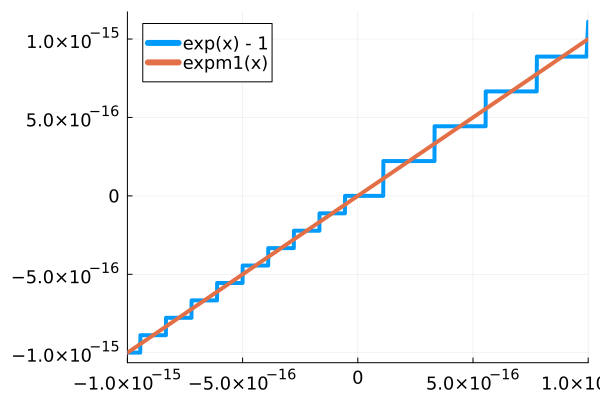

In [5]:
a = 1e-15
plot([x -> exp(x) - 1, x -> expm1(x)], xlim=(-a, a), label=["exp(x) - 1" "expm1(x)"])

## Stable log(1 + x)

What is the condition number of $f \left( x \right) = \log \left( 1 + x \right)$ for $x \approx 0$?

(Pause here and try to plot the condition numbers yourself before continuing!)

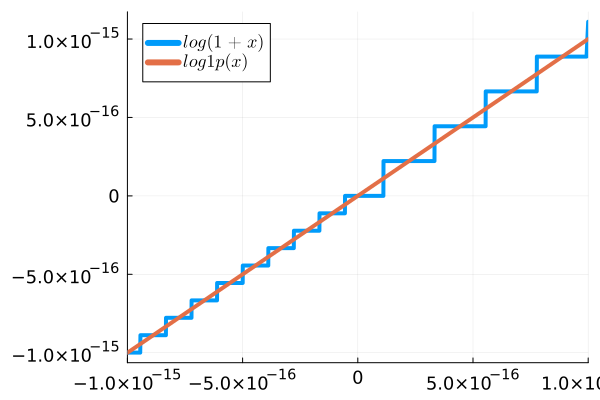

In [6]:
plot([x -> log(1 + x), x -> log1p(x)], xlim=(-a, a), label=["\$log(1 + x)\$" "\$log1p(x)\$"])

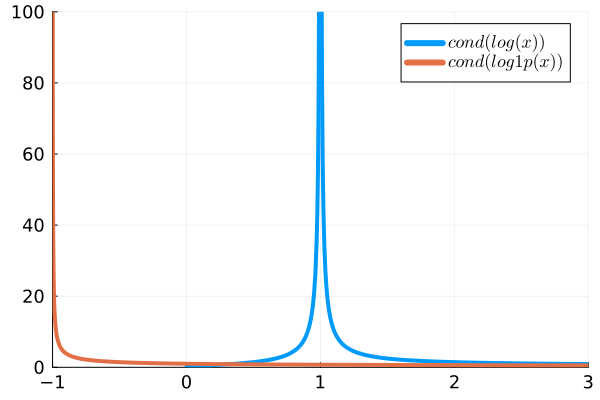

In [7]:
condlog(x)   = abs(1/x       * x / log(x))
condlog1p(x) = abs(1/(1 + x) * x / log1p(x))
plot([condlog, condlog1p], xlims=(-1, 3), ylims=(0, 100), label=["\$cond(log(x))\$" "\$cond(log1p(x))\$"])

## Reliability

**Reliablility** comes from well-conditioned operations and stable algorithms

### Well-conditioned operations

* Modeling turns an abstract question into a mathematical function

* We want well-conditioned models ($\kappa$)

* Some systems are inherently sensitive though (fracture, chaotic systems, combustion, etc)

### Stable algorithms

* An algorithm `f(x)` may be unstable

* These algorithms are unreliable, but may be practical

* Unstable algorithms are constructed from ill-conditioned parts

## An ill-conditioned problem from Paul Olum

From [Surely You're Joking, Mr. Feynman](https://sistemas.fciencias.unam.mx/%7Ecompcuantica/RICHARD%20P.%20FEYNMAN-SURELY%20YOU%27RE%20JOKING%20MR.%20FEYNMAN.PDF) (p 113)

> So Paul is walking past the lunch place and these guys are all excited. “Hey, Paul!” they call out. “Feynman’s terrific! We give him a problem that can be stated in ten seconds, and in a minute he gets the answer to 10 percent. Why don’t you give him one?” Without hardly stopping, he says, “The tangent of 10 to the 100th.” I was sunk: you have to divide by pi to 100 decimal places! It was hopeless.

We can compute the condition number of this problem!

$$ \kappa = \left\lvert f' \left( x \right) \right\rvert \frac{\lvert x \rvert}{\lvert f \rvert} $$

We have

$$ f \left( x \right) = \tan \left( x \right) $$

and

$$ f' \left( x \right) = 1 + \tan^2 \left( x \right) $$

thus

$$ \kappa = \lvert x \rvert \left( \left\lvert \tan \left( x \right) \right\rvert + \left\lvert \frac{1}{\tan \left( x \right)} \right\rvert \right) $$

In [8]:
# what is this value?
tan(1e100)

-0.4116229628832498

In [9]:
# hmm, not enough digits
tan(BigFloat("1e100", precision=400))

0.4012319619908143541857543436532949583238702611292440683194415381168718098221194

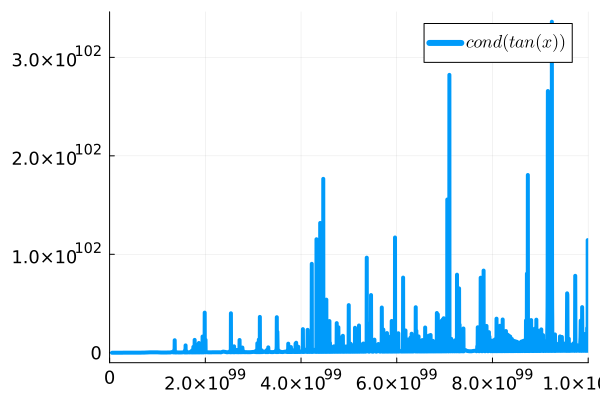

In [10]:
# Let's plot it
f(x) = tan(x)
df(x) = 1 + tan(x)^2
plot(x -> abs(df(x)) * abs(x) / abs(f(x)), xlims=(0, 1e100), label="\$cond(tan(x))\$")

## Exploration

Find some functions

* Find a $f \left( x \right)$ that models something interesting to you

* Find its condition number $\kappa$ as a function of $x$

* Plot the relative error (single or double precision, compare with using `big`)

* Is the relative error ever much bigger than $\kappa \epsilon_\text{machine}$?

* Can you determine what causes the instability?

* Share on Zulip!

Further reading: [FNC Introduction](https://fncbook.com/overview)